In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import itertools
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import time


AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [4]:
te = TransactionEncoder()
dt = pd.read_csv('databasev2.csv', header=None, dtype=str)
dataset = dt.values.tolist()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

NameError: name 'TransactionEncoder' is not defined

In [ ]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 0.05) 
rules = rules.sort_values(['support'], ascending =[False])



In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
842,(Laborable),(Home),0.784934,0.686997,0.530269,0.675558,0.983349,-0.008979,0.964742,-0.072988
843,(Home),(Laborable),0.686997,0.784934,0.530269,0.771864,0.983349,-0.008979,0.942709,-0.051322
949,(Motocicleta),(Laborable),0.655060,0.784934,0.525869,0.802779,1.022735,0.011690,1.090484,0.064445
948,(Laborable),(Motocicleta),0.784934,0.655060,0.525869,0.669953,1.022735,0.011690,1.045123,0.103361
855,(Home),(Motocicleta),0.686997,0.655060,0.468594,0.682089,1.041262,0.018569,1.085022,0.126603
...,...,...,...,...,...,...,...,...,...,...
962879,"(Primavera, [34;50], Mati, Desobeir samoforo, ...",(Motocicleta),0.001669,0.655060,0.001062,0.636364,0.971459,-0.000031,0.948585,-0.028588
962878,"(Primavera, [34;50], Mati, Motocicleta, Colisi...",(Desobeir samoforo),0.002579,0.095357,0.001062,0.411765,4.318124,0.000816,1.537893,0.770405
962877,"(Primavera, [34;50], Mati, Desobeir samoforo, ...",(Colision fronto-lateral),0.001365,0.225080,0.001062,0.777778,3.455567,0.000755,3.487142,0.711584
962876,"(Primavera, Mati, Desobeir samoforo, Motocicle...",([34;50]),0.002048,0.375891,0.001062,0.518519,1.379437,0.000292,1.296226,0.275631


C:\Users\Carlos Lario\AppData\Local\Temp\ipykernel_15732\4114016407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['antecedents'] = top_rules['antecedents'].apply(frozenset_to_str)
C:\Users\Carlos Lario\AppData\Local\Temp\ipykernel_15732\4114016407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['consequents'] = top_rules['consequents'].apply(frozenset_to_str)


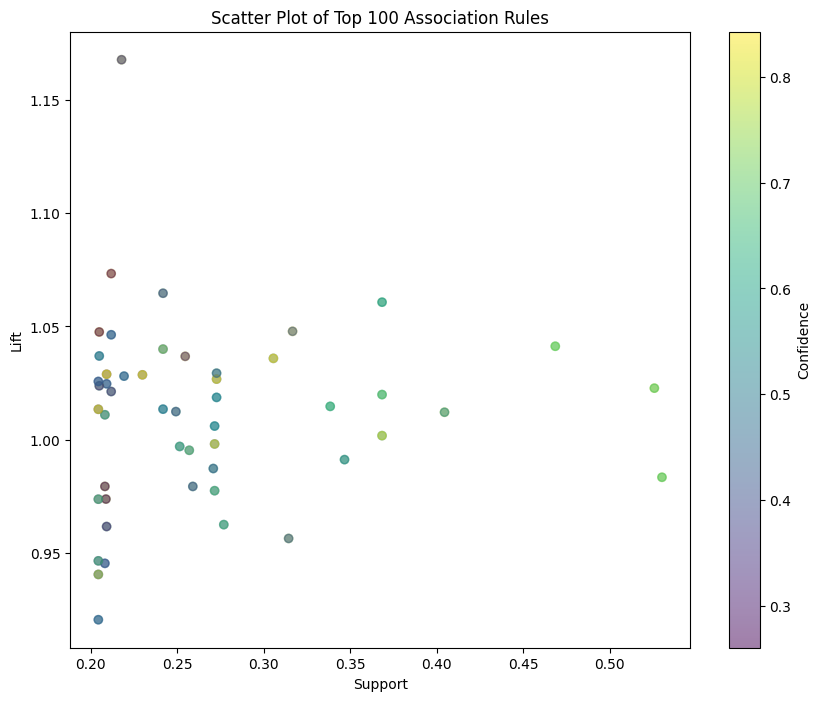

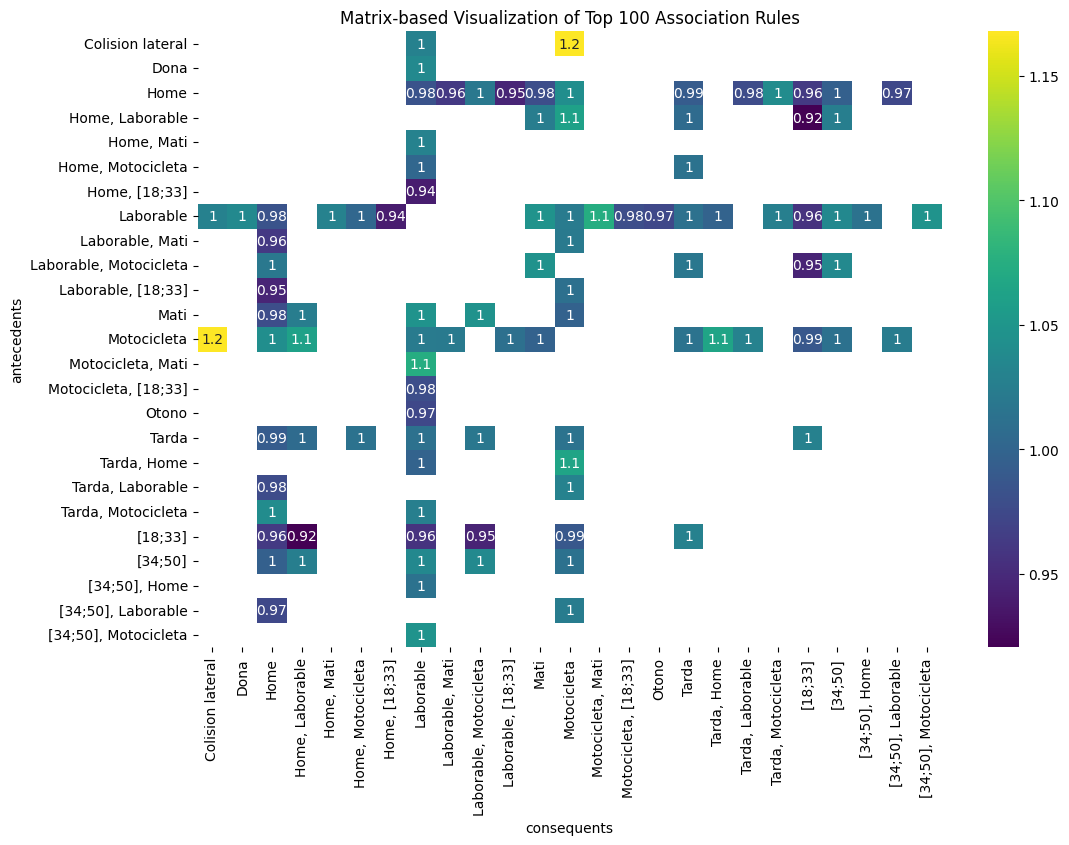

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

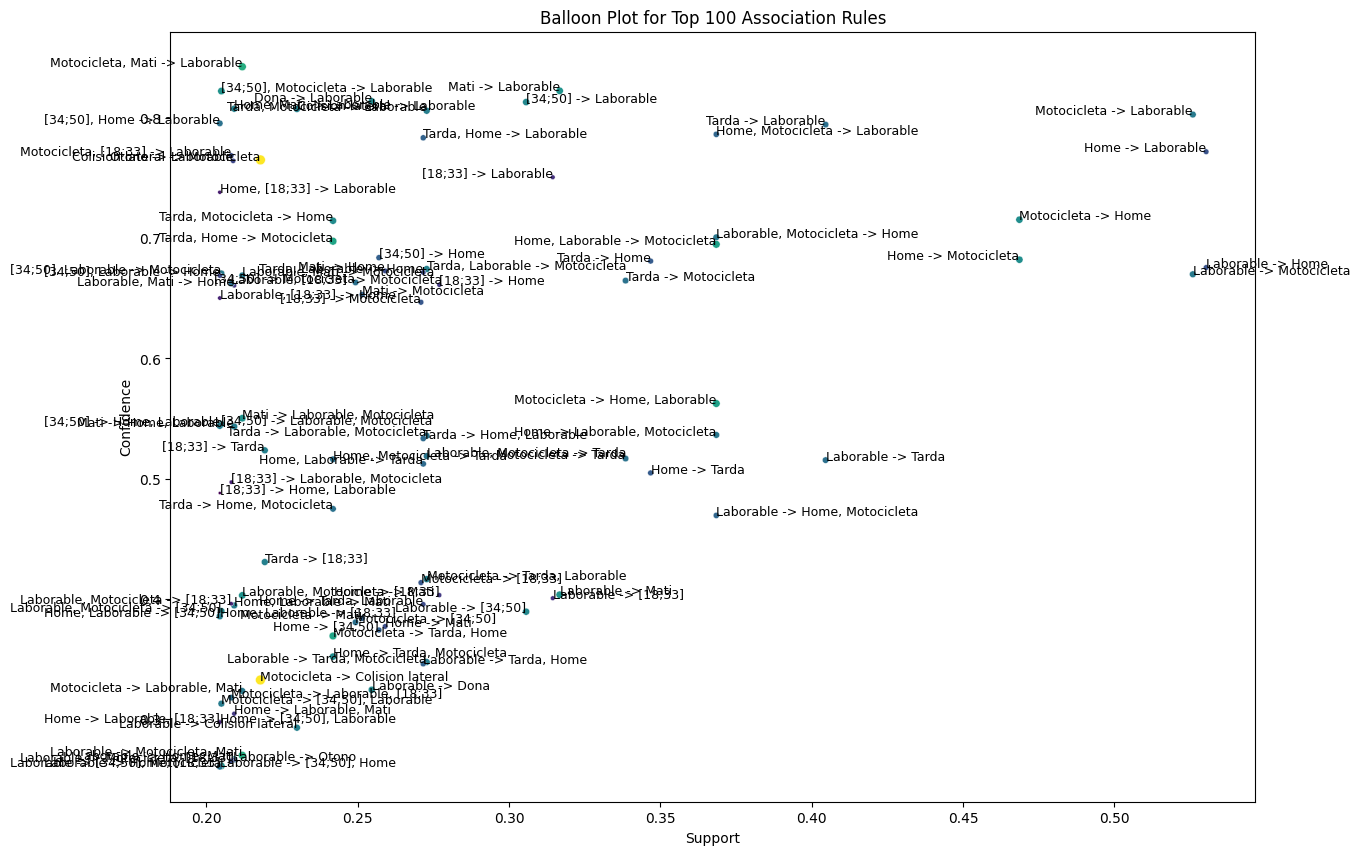

In [ ]:
top_rules = rules.head(100)

# Function to convert frozenset to a readable string
def frozenset_to_str(frozenset_obj):
    return ', '.join(list(frozenset_obj))

# Apply the function to antecedents and consequents
top_rules['antecedents'] = top_rules['antecedents'].apply(frozenset_to_str)
top_rules['consequents'] = top_rules['consequents'].apply(frozenset_to_str)

# Scatter plot of top 100 rules with support and lift on the axes, and confidence represented by color
plt.figure(figsize=(10, 8))
scatter = plt.scatter(top_rules['support'], top_rules['lift'], c=top_rules['confidence'], cmap='viridis', alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Confidence')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Scatter Plot of Top 100 Association Rules')
plt.show()

# Matrix-based visualization of top 100 rules
# Create a pivot table
pivot_table = top_rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Matrix-based Visualization of Top 100 Association Rules')
plt.show()

# Balloon plot of top 100 rules
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    data=top_rules,
    x='support',
    y='confidence',
    size='lift',
    hue='lift',
    sizes=(5, 50),
    palette='viridis',
    legend=False
)

plt.title('Balloon Plot for Top 100 Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')

# Add annotations for the rules
for i in range(top_rules.shape[0]):
    plt.text(
        top_rules['support'].iloc[i],
        top_rules['confidence'].iloc[i],
        f"{top_rules['antecedents'].iloc[i]} -> {top_rules['consequents'].iloc[i]}",  # Rule as string
        fontsize=9,
        ha='right' if i % 2 == 0 else 'left'
    )

# Add a color bar
norm = plt.Normalize(top_rules['lift'].min(), top_rules['lift'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Lift')

plt.show()

# For the balloon plot using seaborn (less customizable but simpler):
plt.figure(figsize=(14, 10))
sns.scatterplot(data=top_rules, x='antecedents', y='consequents', size='support', hue='lift', sizes=(20, 200), palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Balloon Plot of Top 100 Association Rules')
plt.xlabel('Antecedents')
plt.ylabel('Consequents')

# Add a color bar
norm = plt.Normalize(top_rules['lift'].min(), top_rules['lift'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Lift')

plt.show()

C:\Users\Carlos Lario\AppData\Local\Temp\ipykernel_17552\158691396.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['antecedents'] = top_rules['antecedents'].apply(frozenset_to_str)
C:\Users\Carlos Lario\AppData\Local\Temp\ipykernel_17552\158691396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['consequents'] = top_rules['consequents'].apply(frozenset_to_str)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

c:\Users\Carlos Lario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(self._x))
c:\Users\Carlos Lario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:895: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(self._y))
c:\Users\Carlos Lario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array 

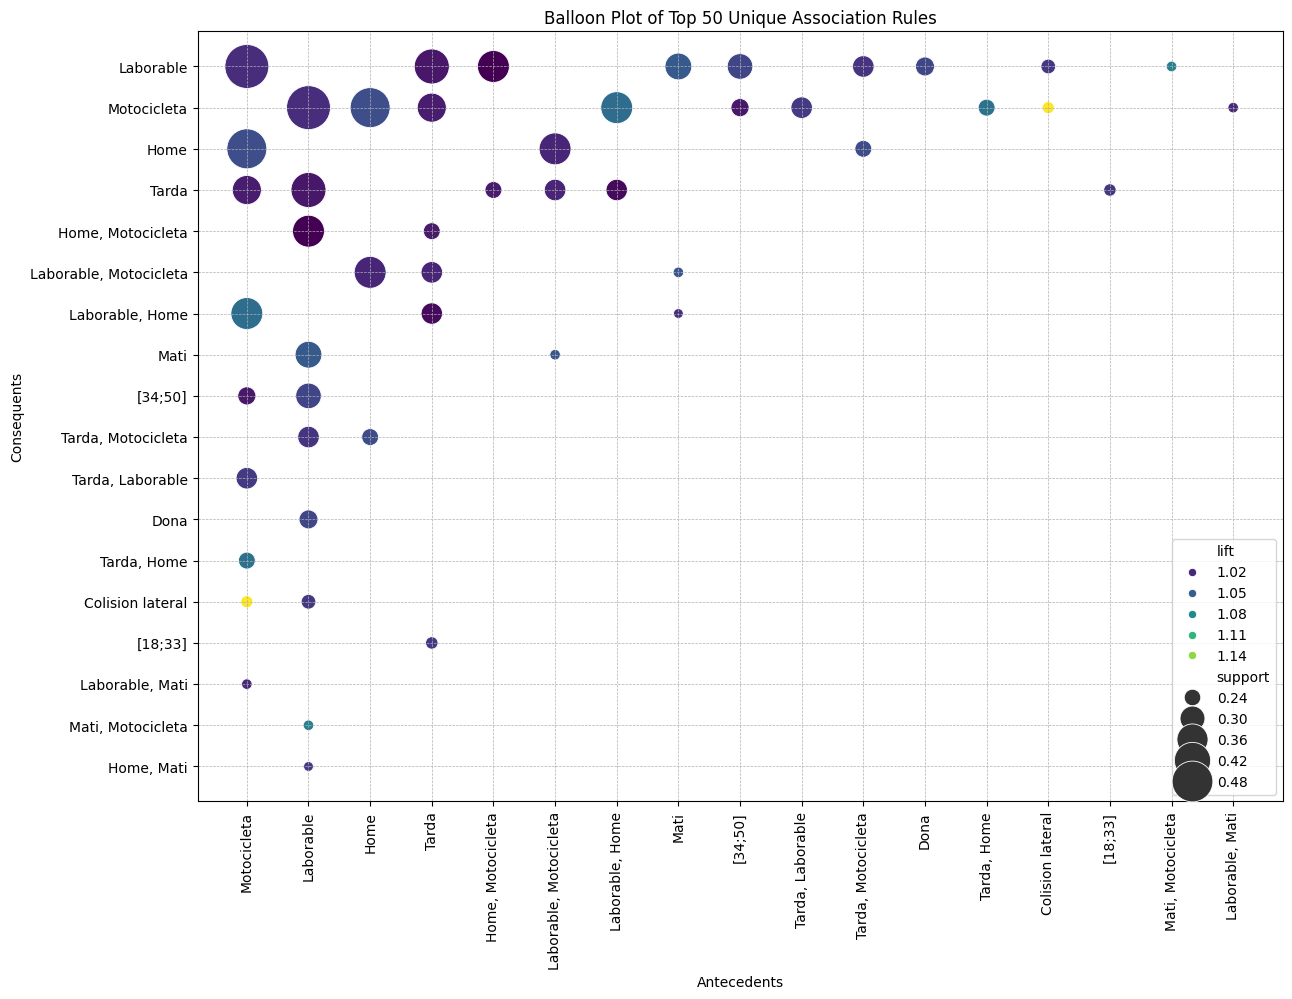

In [ ]:
# Eliminar reglas duplicadas (A, B -> C y C -> A, B)
unique_rules = rules[rules.apply(lambda x: len(x['antecedents']) == 1 or len(x['consequents']) == 1, axis=1)]

# Seleccionar las 50 mejores reglas basadas en el support
top_rules = unique_rules.head(50)

# Función para convertir frozenset a un string legible
def frozenset_to_str(frozenset_obj):
    return ', '.join(list(frozenset_obj))

# Aplicar la función a los antecedentes y consecuentes
top_rules['antecedents'] = top_rules['antecedents'].apply(frozenset_to_str)
top_rules['consequents'] = top_rules['consequents'].apply(frozenset_to_str)

# Crear una tabla pivot
pivot_table = top_rules.pivot(index='consequents', columns='antecedents', values='lift')

# Graficar el balloon plot
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    data=top_rules,
    x='antecedents',
    y='consequents',
    size='support',
    hue='lift',
    sizes=(50, 1000),  # Ajustar tamaños para mejor visualización
    palette='viridis',  # Cambiar a una paleta de colores más oscuros
    edgecolor="w"
)

# Añadir anotaciones para las reglas
for i in range(top_rules.shape[0]):
    plt.text(
        x=top_rules['antecedents'].iloc[i],
        y=top_rules['consequents'].iloc[i],
        s='',
        fontsize=8,
        ha='center',
        va='center'
    )

# Personalizar el gráfico
plt.xticks(rotation=90)
plt.xlabel('Antecedents')
plt.ylabel('Consequents')
plt.title('Balloon Plot of Top 50 Unique Association Rules')

# Añadir una cuadrícula
plt.grid(True, linestyle='--', linewidth=0.5)

# Añadir una barra de color para el lift
norm = plt.Normalize(top_rules['lift'].min(), top_rules['lift'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Lift')

# Añadir una leyenda para el tamaño y el color
sizes = [top_rules['support'].min(), top_rules['support'].mean(), top_rules['support'].max()]
for size in sizes:
    plt.scatter([], [], s=size*1000, c='gray', alpha=0.5, label=f'Support: {size:.2f}')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Size: Support\nColor: Lift')

plt.show()

In [ ]:
rules['num_items'] = rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x))
rules = rules.sort_values(['support'], ascending= [False])
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
584,(Home),(Laborable),0.686997,0.784934,0.530269,0.771864,0.983349,-0.008979,0.942709,-0.051322,2
585,(Laborable),(Home),0.784934,0.686997,0.530269,0.675558,0.983349,-0.008979,0.964742,-0.072988,2
673,(Laborable),(Motocicleta),0.784934,0.655060,0.525869,0.669953,1.022735,0.011690,1.045123,0.103361,2
672,(Motocicleta),(Laborable),0.655060,0.784934,0.525869,0.802779,1.022735,0.011690,1.090484,0.064445,2
596,(Home),(Motocicleta),0.686997,0.655060,0.468594,0.682089,1.041262,0.018569,1.085022,0.126603,2
...,...,...,...,...,...,...,...,...,...,...,...
96677,"(Dona, Invierno, Gir indegut o sense precaucio)","(Colision lateral, Laborable)",0.008648,0.229935,0.005007,0.578947,2.517877,0.003018,1.828905,0.608099,5
96676,"(Dona, Invierno, Colision lateral)","(Laborable, Gir indegut o sense precaucio)",0.020482,0.096495,0.005007,0.244444,2.533229,0.003030,1.195815,0.617903,5
96675,"(Dona, Invierno, Laborable)","(Colision lateral, Gir indegut o sense precaucio)",0.059703,0.080640,0.005007,0.083863,1.039961,0.000192,1.003517,0.040866,5
96674,"(Dona, Colision lateral, Laborable, Gir indegu...",(Invierno),0.020255,0.232969,0.005007,0.247191,1.061046,0.000288,1.018892,0.058723,5


In [ ]:
rules2=rules[rules['num_items']==3]
rules2 = rules2.sort_values('support', ascending = False)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
3855,(Laborable),"(Home, Motocicleta)",0.784934,0.468594,0.368457,0.469411,1.001745,0.000642,1.001541,0.008102,3
3852,"(Home, Laborable)",(Motocicleta),0.530269,0.655060,0.368457,0.694850,1.060742,0.021099,1.130394,0.121908,3
3857,(Motocicleta),"(Home, Laborable)",0.655060,0.530269,0.368457,0.562478,1.060742,0.021099,1.073619,0.166011,3
3856,(Home),"(Laborable, Motocicleta)",0.686997,0.525869,0.368457,0.536330,1.019893,0.007187,1.022561,0.062315,3
3854,"(Home, Motocicleta)",(Laborable),0.468594,0.784934,0.368457,0.786304,1.001745,0.000642,1.006411,0.003279,3
...,...,...,...,...,...,...,...,...,...,...,...
1406,(Bicicleta),"(Dona, Primavera)",0.099074,0.077530,0.010014,0.101072,1.303650,0.002332,1.026189,0.258538,3
1402,"(Dona, Bicicleta)",(Primavera),0.037020,0.258079,0.010014,0.270492,1.048096,0.000460,1.017015,0.047653,3
1405,(Dona),"(Bicicleta, Primavera)",0.312927,0.026779,0.010014,0.032000,1.194969,0.001634,1.005394,0.237468,3
1404,"(Bicicleta, Primavera)",(Dona),0.026779,0.312927,0.010014,0.373938,1.194969,0.001634,1.097452,0.167648,3


In [ ]:
rules4=rules[rules['num_items']==4]
rules4 = rules4[rules4['consequents'].apply(lambda x: len(x) == 1)]
rules4 = rules4.sort_values('support', ascending = True)
rules4.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
32747,"(Motocicleta, Otono, Gir indegut o sense preca...",(Colision fronto-lateral),0.021924,0.225080,0.005007,0.228374,1.014635,0.000072,1.004269,0.014747,4
44787,"(Dona, Invierno, No respectar distancies)",([18;33]),0.010014,0.418905,0.005007,0.500000,1.193589,0.000812,1.162191,0.163831,4
44785,"([18;33], Dona, No respectar distancies)",(Invierno),0.023365,0.232969,0.005007,0.214286,0.919803,-0.000437,0.976221,-0.081959,4
44786,"([18;33], No respectar distancies, Invierno)",(Dona),0.015096,0.312927,0.005007,0.331658,1.059859,0.000283,1.028027,0.057344,4
44784,"([18;33], Dona, Invierno)",(No respectar distancies),0.033834,0.143832,0.005007,0.147982,1.028850,0.000140,1.004870,0.029023,4
25761,"(Caiguda (dues rodes), Home, Mati)",(Manca d'atencio a la conduccio),0.026931,0.204445,0.005007,0.185915,0.909365,-0.000499,0.977238,-0.092911,4
25760,"(Manca d'atencio a la conduccio, Caiguda (dues...",(Home),0.008421,0.686997,0.005007,0.594595,0.865498,-0.000778,0.772073,-0.135490,4
27550,"([18;33], Caiguda (dues rodes), Otono)",(Tarda),0.012062,0.509255,0.005007,0.415094,0.815101,-0.001136,0.839016,-0.186735,4
25759,"(Manca d'atencio a la conduccio, Home, Mati)",(Caiguda (dues rodes)),0.050827,0.101578,0.005007,0.098507,0.969772,-0.000156,0.996594,-0.031795,4
21166,"(Colision fronto-lateral, [18;33], Altres)",(Laborable),0.007662,0.784934,0.005007,0.653465,0.832510,-0.001007,0.620619,-0.168565,4


In [ ]:
rules5 = rules[rules['consequents'].apply(lambda x: len(x) == 1)]
rules5 = rules5.sort_values('confidence', ascending = False)
rules5.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31331,"(Turisme, Mati, Desobeir samoforo)",(Colision fronto-lateral),0.005159,0.225080,0.005083,0.985294,4.377535,0.003922,52.694584,0.775562
31191,"(Turisme, Laborable, Desobeir samoforo)",(Colision fronto-lateral),0.006752,0.225080,0.006600,0.977528,4.343032,0.005080,34.483955,0.774978
88632,"(Desobeir samoforo, Home, Laborable, Turisme)",(Colision fronto-lateral),0.005310,0.225080,0.005159,0.971429,4.315932,0.003963,27.122212,0.772402
5455,"(Turisme, Desobeir samoforo)",(Colision fronto-lateral),0.011910,0.225080,0.011531,0.968153,4.301379,0.008850,24.332499,0.776768
25156,"(Canvi de carril sense precaucio, Home, Caigud...",(Motocicleta),0.007055,0.655060,0.006827,0.967742,1.477333,0.002206,10.693142,0.325400
30925,"(Turisme, Home, Desobeir samoforo)",(Colision fronto-lateral),0.008572,0.225080,0.008269,0.964602,4.285602,0.006339,21.891500,0.773289
148108,"(Canvi de carril sense precaucio, Mati, Home, ...",(Motocicleta),0.005917,0.655060,0.005690,0.961538,1.467863,0.001813,8.968442,0.320635
148357,"(Canvi de carril sense precaucio, Mati, Home, ...",(Laborable),0.005917,0.784934,0.005690,0.961538,1.224993,0.001045,5.591716,0.184762
80800,"(Laborable, Home, Caiguda (dues rodes), Nit)",(Motocicleta),0.007738,0.655060,0.007434,0.960784,1.466712,0.002366,8.795972,0.320684
130501,"(Dona, Mati, Abast, Otono, Motocicleta)",(Laborable),0.007434,0.784934,0.007131,0.959184,1.221993,0.001295,5.269117,0.183025


In [ ]:
rules6 = rules[rules['consequents'].apply(lambda x: len(x) == 1)]
rules6 = rules6.sort_values('confidence', ascending = True)
rules6.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
814,(Motocicleta),(mas 70),0.655060,0.011455,0.005007,0.007643,0.667246,-0.002497,0.996159,-0.591128,2
791,(Motocicleta),(No cedir la dreta),0.655060,0.010090,0.005462,0.008338,0.826418,-0.001147,0.998234,-0.378465,2
683,(Laborable),(No respectat pas de vianants),0.784934,0.007890,0.006676,0.008505,1.077994,0.000483,1.000621,0.336412,2
589,(Home),(Manca precaucio efectuar marxa enrera),0.686997,0.010469,0.006296,0.009165,0.875475,-0.000896,0.998684,-0.312444,2
677,(Laborable),(No cedir la dreta),0.784934,0.010090,0.007207,0.009181,0.909995,-0.000713,0.999083,-0.315019,2
601,(Home),(No cedir la dreta),0.686997,0.010090,0.006524,0.009496,0.941221,-0.000407,0.999401,-0.166331,2
841,(Tarda),(No cedir la dreta),0.509255,0.010090,0.005234,0.010279,1.018737,0.000096,1.000191,0.037479,2
665,(Laborable),(Manca precaucio efectuar marxa enrera),0.784934,0.010469,0.008421,0.010728,1.024733,0.000203,1.000262,0.112227,2
705,(Laborable),(mas 70),0.784934,0.011455,0.008648,0.011018,0.961822,-0.000343,0.999558,-0.155807,2
549,(Tarda),(Furgoneta),0.509255,0.014338,0.005690,0.011172,0.779227,-0.001612,0.996799,-0.366018,2


In [ ]:
rules7 = rules[rules['consequents'].apply(lambda x: len(x) == 1)]
rules7 = rules7.sort_values('lift', ascending = True)
rules7.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6848,"(No respectar distancies, Laborable)",(Colision lateral),0.118874,0.284782,0.005993,0.050415,0.177029,-0.027860,0.753190,-0.840662
6847,"(Colision lateral, Laborable)",(No respectar distancies),0.229935,0.143832,0.005993,0.026064,0.181211,-0.027079,0.879080,-0.854389
410,(Colision lateral),(No respectar distancies),0.284782,0.143832,0.007662,0.026905,0.187055,-0.033299,0.879839,-0.858687
411,(No respectar distancies),(Colision lateral),0.143832,0.284782,0.007662,0.053270,0.187055,-0.033299,0.755461,-0.835421
385,(Desobeir samoforo),(Colision lateral),0.095357,0.284782,0.005159,0.054097,0.189959,-0.021998,0.756122,-0.824984
384,(Colision lateral),(Desobeir samoforo),0.284782,0.095357,0.005159,0.018114,0.189959,-0.021998,0.921332,-0.856368
6702,"(Colision lateral, Home)",(No respectar distancies),0.196556,0.143832,0.005538,0.028174,0.195884,-0.022733,0.880989,-0.836316
39648,"(Colision lateral, Laborable, Motocicleta)",(No respectar distancies),0.177742,0.143832,0.005083,0.028596,0.198813,-0.020482,0.881371,-0.830536
7051,"(Colision lateral, Motocicleta)",(No respectar distancies),0.217873,0.143832,0.006372,0.029248,0.203347,-0.024965,0.881963,-0.833584
6704,"(Home, No respectar distancies)",(Colision lateral),0.095509,0.284782,0.005538,0.057983,0.203603,-0.021661,0.759240,-0.812191


In [ ]:
rules8 = rules[rules['consequents'].apply(lambda x: len(x) == 1)]
rules8 = rules8.sort_values('lift', ascending = False)
rules8.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
19586,"(No respectar distancies, Turisme, Tarda)",(Abast multiple),0.016158,0.033379,0.005614,0.347418,10.408323,0.005074,1.481225,0.918769,4
19403,"(No respectar distancies, Home, Turisme)",(Abast multiple),0.016234,0.033379,0.005310,0.327103,9.799703,0.004768,1.436506,0.912774,4
2095,"(No respectar distancies, Turisme)",(Abast multiple),0.028600,0.033379,0.009179,0.320955,9.615517,0.008225,1.423501,0.922381,3
19516,"(No respectar distancies, Turisme, Laborable)",(Abast multiple),0.022151,0.033379,0.007055,0.318493,9.541765,0.006316,1.418359,0.915477,4
11760,"(Manca d'atencio a la conduccio, Nit)",(Xoc contra element estatic),0.029738,0.028751,0.006221,0.209184,7.275618,0.005366,1.228160,0.888991,3
52554,"(Manca d'atencio a la conduccio, Home, Turisme)",(Xoc contra element estatic),0.027158,0.028751,0.005386,0.198324,6.897908,0.004605,1.211523,0.878898,4
19601,"(Turisme, Tarda, [34;50])",(Abast multiple),0.024200,0.033379,0.005083,0.210031,6.292348,0.004275,1.223620,0.861935,4
11186,"(Menor, Laborable)",(Veh. Mobilidad personal con o sin motor),0.009407,0.098164,0.005765,0.612903,6.243656,0.004842,2.329743,0.847813,3
11185,"(Veh. Mobilidad personal con o sin motor, Labo...",(Menor),0.078137,0.011910,0.005765,0.073786,6.195238,0.004835,1.066806,0.909664,3
11940,"(Manca d'atencio a la conduccio, Turisme)",(Xoc contra element estatic),0.044682,0.028751,0.007662,0.171477,5.964145,0.006377,1.172265,0.871261,3


In [ ]:
# Filtrando las reglas donde "camion" está en los antecedentes o consecuentes
camion_rules = rules[rules['antecedents'].apply(lambda x: 'Camion' in x)]

# Mostrando las reglas filtradas
camion_rules.sort_values(['lift'], ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78319,(Camion),"(Home, [51;70], Laborable)",0.003186,0.107343,0.001062,0.333333,3.105300,0.000720,1.338985,0.680137
78291,(Camion),"(Verano, Home, Laborable)",0.003186,0.129722,0.001214,0.380952,2.936675,0.000800,1.405833,0.661587
9723,(Camion),"(Home, [51;70])",0.003186,0.134350,0.001214,0.380952,2.835525,0.000786,1.398358,0.649401
78315,"(Laborable, Camion)","(Home, [51;70])",0.002807,0.134350,0.001062,0.378378,2.816366,0.000685,1.392568,0.646748
78287,"(Laborable, Camion)","(Verano, Home)",0.002807,0.165453,0.001214,0.432432,2.613629,0.000749,1.470393,0.619128
9697,(Camion),"(Home, Manca d'atencio a la conduccio)",0.003186,0.139129,0.001062,0.333333,2.395856,0.000619,1.291306,0.584475
78314,"(Home, Camion)","([51;70], Laborable)",0.003034,0.146791,0.001062,0.350000,2.384341,0.000617,1.312629,0.582364
9711,(Camion),"(Verano, Home)",0.003186,0.165453,0.001214,0.380952,2.302482,0.000687,1.348115,0.567494
9747,(Camion),"([51;70], Laborable)",0.003186,0.146791,0.001062,0.333333,2.270801,0.000594,1.279813,0.561416
78309,"(Home, Laborable, Camion)",([51;70]),0.002655,0.181763,0.001062,0.400000,2.200668,0.000579,1.363728,0.547045


In [ ]:
dt

,0,1,2,3,4,5,6,7
0,Estacion,Tipo dia,Descripcio_causa_mediata,Descripcio_torn,Descripcio_tipus_accident,Tipo_vehiculo,Genero,Edad
1,Otono,Laborable,No respectar distancies,Tarda,Abast,Motocicleta,Home,[18;33]
2,Invierno,Laborable,No respectar distancies,Tarda,Abast,Motocicleta,Home,[34;50]
3,Invierno,Laborable,Adelantamiento improcedente,Mati,Colision lateral,Motocicleta,Home,[34;50]
4,Verano,Laborable,Manca d'atencio a la conduccio,Mati,Atropellament,Motocicleta,Dona,[18;33]
...,...,...,...,...,...,...,...,...
13177,Verano,Laborable,Manca d'atencio a la conduccio,Mati,Abast,Motocicleta,Home,[34;50]
13178,Invierno,Laborable,Desobeir samoforo,Tarda,Colision fronto-lateral,Veh. Mobilidad personal con o sin motor,Dona,[18;33]
13179,Verano,Laborable,Desobeir altres senyals,Nit,Colision lateral,Motocicleta,Home,[34;50]
13180,Verano,Laborable,Manca d'atencio a la conduccio,Mati,Colision fronto-lateral,Veh. Mobilidad personal con o sin motor,Home,[34;50]


In [ ]:
# Filtrando las reglas donde "Camion" está en los antecedentes o consecuentes
# y los antecedentes contienen solo "Camion"
camion_rules = rules[rules['antecedents'].apply(lambda x: x == frozenset(['Camion']))]

# Mostrando las reglas filtradas
print(camion_rules)


In [ ]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
584,(Home),(Laborable),0.686997,0.784934,0.530269,0.771864,0.983349,-0.008979,0.942709,-0.051322,2
585,(Laborable),(Home),0.784934,0.686997,0.530269,0.675558,0.983349,-0.008979,0.964742,-0.072988,2
673,(Laborable),(Motocicleta),0.784934,0.655060,0.525869,0.669953,1.022735,0.011690,1.045123,0.103361,2
672,(Motocicleta),(Laborable),0.655060,0.784934,0.525869,0.802779,1.022735,0.011690,1.090484,0.064445,2
596,(Home),(Motocicleta),0.686997,0.655060,0.468594,0.682089,1.041262,0.018569,1.085022,0.126603,2


In [ ]:
rules9 = rules[rules['consequents'].apply(lambda x: len(x) == 1)]

# Filtramos las reglas que contienen los antecedentes específicos
antedecentes = {'Camion'}


In [ ]:
rules.antecedents

584                                                  (Home)
585                                             (Laborable)
673                                             (Laborable)
672                                           (Motocicleta)
596                                                  (Home)
                                ...                        
96677       (Dona, Invierno, Gir indegut o sense precaucio)
96676                    (Dona, Invierno, Colision lateral)
96675                           (Dona, Invierno, Laborable)
96674     (Dona, Colision lateral, Laborable, Gir indegu...
142341                                          (Primavera)
Name: antecedents, Length: 173672, dtype: object

In [ ]:
# Definir los ítems específicos
items_to_analyze = {
    'Home', 'Dona', 'Camion', 'Manca d\'atencio a la conduccio', 
    'No respectar distancies', 'Gir indegut o sense precaucio', 'Desobeir samoforo'
}

# Filtrar las reglas que contienen únicamente los ítems específicos en los antecedentes y consecuentes
# Además, aseguramos que 'Camion' solo esté en los antecedentes
rules_filtered = rules[
    rules['antecedents'].apply(lambda antecedents: set(antecedents).issubset(items_to_analyze)) &
    rules['consequents'].apply(lambda consequents: set(consequents).issubset(items_to_analyze)) &
    rules['antecedents'].apply(lambda antecedents: 'Camion' in antecedents) &
    rules['consequents'].apply(lambda consequents: 'Camion' not in consequents)
]

# Ordenar por 'lift' y mostrar las primeras reglas
rules_filtered = rules_filtered.sort_values('lift', ascending=False)

# Imprimir las primeras 10 reglas
rules_filtered.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items


In [ ]:
# Suponiendo que 'df' es tu DataFrame
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['support'], ascending=[False])

# Filtrando las reglas donde "Camion" está en los antecedentes o consecuentes
# y los antecedentes contienen solo "Camion"
camion_rules = rules[rules['antecedents'].apply(lambda x: x == frozenset(['Camion']))]



AttributeError: 'DataFrame' object has no attribute 'HEAD'

In [ ]:
# Mostrando las reglas filtradas
camion_rules.sort_values(['lift'], ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
46931,(Camion),"(Home, Laborable, [51;70])",0.003186,0.107343,0.001062,0.333333,3.105300,0.000720,1.338985,0.680137
46903,(Camion),"(Home, Laborable, Verano)",0.003186,0.129722,0.001214,0.380952,2.936675,0.000800,1.405833,0.661587
5552,(Camion),"(Home, [51;70])",0.003186,0.134350,0.001214,0.380952,2.835525,0.000786,1.398358,0.649401
5529,(Camion),"(Manca d'atencio a la conduccio, Home)",0.003186,0.139129,0.001062,0.333333,2.395856,0.000619,1.291306,0.584475
5540,(Camion),"(Home, Verano)",0.003186,0.165453,0.001214,0.380952,2.302482,0.000687,1.348115,0.567494
5573,(Camion),"(Laborable, [51;70])",0.003186,0.146791,0.001062,0.333333,2.270801,0.000594,1.279813,0.561416
5561,(Camion),"(Laborable, Verano)",0.003186,0.188211,0.001290,0.404762,2.150573,0.000690,1.363805,0.536718
256,(Camion),([51;70]),0.003186,0.181763,0.001214,0.380952,2.095874,0.000635,1.321767,0.524543
5534,(Camion),"(Home, Mati)",0.003186,0.259065,0.001593,0.500000,1.930015,0.000768,1.481869,0.483409
46890,(Camion),"(Home, Laborable, Mati)",0.003186,0.209225,0.001214,0.380952,1.820781,0.000547,1.277406,0.452226


In [ ]:
categories = {
 '[18;33]', '[34;50]', '[51;70]', 'Manca d\'atencio a la conduccio', 'No respectar distancies', 'Gir indegut o sense precaucio',
    'Desobeir samoforo', 'Canvi de carril sense precaucio', 'Home', 'Dona'
}

# Filtrando las reglas donde los antecedentes y consecuentes contienen cualquier combinación de los ítems de las categorías especificadas
filtered_rules = rules[
    rules['antecedents'].apply(lambda x: all(item in categories for item in x)) &
    rules['consequents'].apply(lambda x: all(item in categories for item in x))
]
filtered_rules.sort_values(['lift'], ascending=False).head(25)    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15935,"(Dona, Gir indegut o sense precaucio)",([18;33]),0.038082,0.418905,0.020179,0.529880,1.264919,0.004226,1.236059,0.217727
15938,([18;33]),"(Dona, Gir indegut o sense precaucio)",0.418905,0.038082,0.020179,0.048171,1.264919,0.004226,1.010599,0.360415
10080,"(Canvi de carril sense precaucio, Home)",([51;70]),0.061523,0.181763,0.013731,0.223181,1.227870,0.002548,1.053318,0.197747
10081,([51;70]),"(Canvi de carril sense precaucio, Home)",0.181763,0.061523,0.013731,0.075543,1.227870,0.002548,1.015165,0.226806
10082,(Canvi de carril sense precaucio),"(Home, [51;70])",0.085723,0.134350,0.013731,0.160177,1.192238,0.002214,1.030753,0.176359
10079,"(Home, [51;70])",(Canvi de carril sense precaucio),0.134350,0.085723,0.013731,0.102202,1.192238,0.002214,1.018355,0.186266
16811,"(No respectar distancies, [18;33])",(Dona),0.063116,0.312927,0.023365,0.370192,1.183000,0.003614,1.090926,0.165113
16814,(Dona),"(No respectar distancies, [18;33])",0.312927,0.063116,0.023365,0.074667,1.183000,0.003614,1.012482,0.225146
9984,"(Canvi de carril sense precaucio, Dona)",([34;50]),0.024200,0.375891,0.010696,0.442006,1.175888,0.001600,1.118487,0.153289
9985,([34;50]),"(Canvi de carril sense precaucio, Dona)",0.375891,0.024200,0.010696,0.028456,1.175888,0.001600,1.004381,0.239668


In [ ]:
categories = {
    'Manca d\'atencio a la conduccio', 'No respectar distancies', 'Gir indegut o sense precaucio',
    'Desobeir samoforo', 'Canvi de carril sense precaucio', 'Colision lateral', 
    'Abast', 'Colision fronto-lateral', 'Caiguda (dues rodes)', '[18;33]', '[34;50]', '[51;70]', 
    'Home', 'Dona'
}

# Filtrando las reglas donde los antecedentes y consecuentes contienen cualquier combinación de los ítems de las categorías especificadas
filtered_rules = rules[
    rules['antecedents'].apply(lambda x: all(item in categories for item in x)) &
    rules['consequents'].apply(lambda x: all(item in categories for item in x))
]
filtered_rules.sort_values(['lift'], ascending=False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
88126,"(Desobeir samoforo, [51;70])","(Home, Colision fronto-lateral)",0.015476,0.158625,0.010165,0.656863,4.140968,0.007711,2.452006,0.770434
88127,"(Home, Colision fronto-lateral)","(Desobeir samoforo, [51;70])",0.158625,0.015476,0.010165,0.064084,4.140968,0.007711,1.051937,0.901514
87877,"(Colision fronto-lateral, [18;33])","(Desobeir samoforo, Dona)",0.096571,0.026855,0.010545,0.109191,4.065973,0.007951,1.092428,0.834660
87872,"(Desobeir samoforo, Dona)","(Colision fronto-lateral, [18;33])",0.026855,0.096571,0.010545,0.392655,4.065973,0.007951,1.487506,0.774865
88125,"([51;70], Colision fronto-lateral)","(Desobeir samoforo, Home)",0.037248,0.068503,0.010165,0.272912,3.983977,0.007614,1.281135,0.777972
88128,"(Desobeir samoforo, Home)","([51;70], Colision fronto-lateral)",0.068503,0.037248,0.010165,0.148394,3.983977,0.007614,1.130514,0.804076
88133,(Desobeir samoforo),"(Home, [51;70], Colision fronto-lateral)",0.095357,0.027310,0.010165,0.106603,3.903447,0.007561,1.088755,0.822221
88120,"(Home, [51;70], Colision fronto-lateral)",(Desobeir samoforo),0.027310,0.095357,0.010165,0.372222,3.903447,0.007561,1.441024,0.764700
27155,"(No respectar distancies, Dona)","(Abast, [18;33])",0.048323,0.099757,0.018662,0.386185,3.871250,0.013841,1.466636,0.779346
27158,"(Abast, [18;33])","(No respectar distancies, Dona)",0.099757,0.048323,0.018662,0.187072,3.871250,0.013841,1.170678,0.823873


In [ ]:
antecedent_categories = ['Turisme','Dona','Home','Motocicleta','Furgoneta']

# Lista de categorías para consecuentes
consequent_categories = [
    'Manca d\'atencio a la conduccio', 'No respectar distancies', 'Gir indegut o sense precaucio',
    'Desobeir samoforo', 'Canvi de carril sense precaucio','Desobeir altres senyals','No determinada','Adelantamiento improcedente',
'Manca precaucio incorporacio circulacio','Manca precaucio efectuar marxa enrera','No cedir la dreta','No respectat pas de vianants',
'Envair calzada contraria','Fallada mecanica o avaria']

# Filtrando las reglas donde los antecedentes contienen únicamente uno de los ítems de las categorías especificadas
# y los consecuentes contienen únicamente uno de los ítems de las categorías especificadas
demographic_rules = rules[
    rules['antecedents'].apply(lambda x: len(x) == 2 and all(item in antecedent_categories for item in x)) &
    rules['consequents'].apply(lambda x: len(x) == 1 and all(item in consequent_categories for item in x))
]

# Mostrando las reglas filtradas
demographic_rules.sort_values(['confidence'], ascending = False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16230,"(Turisme, Dona)",(Manca d'atencio a la conduccio),0.045289,0.204445,0.017524,0.386935,1.892606,0.008265,1.297667,0.494001
17220,"(Furgoneta, Home)",(Manca d'atencio a la conduccio),0.012289,0.204445,0.004476,0.364198,1.781392,0.001963,1.251261,0.444099
18480,"(Turisme, Home)",(Manca d'atencio a la conduccio),0.075785,0.204445,0.027158,0.358358,1.752831,0.011664,1.239874,0.464713
17237,"(Furgoneta, Home)",(No respectar distancies),0.012289,0.143832,0.003641,0.296296,2.060009,0.001874,1.216659,0.520968
16799,"(Turisme, Dona)",(No respectar distancies),0.045289,0.143832,0.012365,0.273032,1.898262,0.005851,1.177723,0.495650
19193,"(Turisme, Home)",(No respectar distancies),0.075785,0.143832,0.016234,0.214214,1.489331,0.005334,1.089569,0.355499
16194,"(Motocicleta, Dona)",(Manca d'atencio a la conduccio),0.186466,0.204445,0.034972,0.187551,0.917364,-0.003150,0.979205,-0.099689
18444,"(Motocicleta, Home)",(Manca d'atencio a la conduccio),0.468594,0.204445,0.085420,0.182289,0.891627,-0.010382,0.972904,-0.186147
16505,"(Motocicleta, Dona)",(No respectar distancies),0.186466,0.143832,0.033075,0.177380,1.233240,0.006255,1.040781,0.232477
18827,"(Motocicleta, Home)",(No respectar distancies),0.468594,0.143832,0.071006,0.151530,1.053516,0.003607,1.009072,0.095591


In [ ]:
antecedent_categories = ['[18;33]','[34;50]','[51;70]','Home', 'Dona']

# Lista de categorías para consecuentes
consequent_categories = [
    'Manca d\'atencio a la conduccio', 'No respectar distancies', 'Gir indegut o sense precaucio',
    'Desobeir samoforo', 'Canvi de carril sense precaucio'
]

# Filtrando las reglas donde los antecedentes contienen únicamente uno de los ítems de las categorías especificadas
# y los consecuentes contienen únicamente uno de los ítems de las categorías especificadas
demographic_rules = rules[
    rules['antecedents'].apply(lambda x: all(item in antecedent_categories for item in x)) &
    rules['consequents'].apply(lambda x: all(item in consequent_categories for item in x))
]

# Mostrando las reglas filtradas
demographic_rules.sort_values(['lift'], ascending = False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10079,"(Home, [51;70])",(Canvi de carril sense precaucio),0.134350,0.085723,0.013731,0.102202,1.192238,0.002214,1.018355,0.186266
16258,"([34;50], Dona)",(Manca d'atencio a la conduccio),0.118874,0.204445,0.027841,0.234205,1.145565,0.003538,1.038862,0.144211
16812,"(Dona, [18;33])",(No respectar distancies),0.141936,0.143832,0.023365,0.164618,1.144511,0.002950,1.024881,0.147150
15934,"(Dona, [18;33])",(Gir indegut o sense precaucio),0.141936,0.124412,0.020179,0.142170,1.142734,0.002520,1.020701,0.145567
16822,"([51;70], Dona)",(No respectar distancies),0.047413,0.143832,0.007662,0.161600,1.123529,0.000842,1.021192,0.115420
459,([51;70]),(Canvi de carril sense precaucio),0.181763,0.085723,0.017145,0.094324,1.100334,0.001563,1.009497,0.111441
832,([18;33]),(Gir indegut o sense precaucio),0.418905,0.124412,0.057275,0.136726,1.098975,0.005158,1.014264,0.154986
15264,"(Home, [18;33])",(Desobeir samoforo),0.276969,0.095357,0.028675,0.103533,1.085740,0.002264,1.009120,0.109220
17632,"(Home, [18;33])",(Gir indegut o sense precaucio),0.276969,0.124412,0.037096,0.133936,1.076551,0.002638,1.010997,0.098346
723,(Dona),(No respectar distancies),0.312927,0.143832,0.048323,0.154424,1.073639,0.003314,1.012526,0.099827


In [ ]:
antecedent_categories = ['Turisme','Motocicleta','Furgoneta']

# Lista de categorías para consecuentes
consequent_categories = [
    'Colision lateral', 
    'Abast', 'Colision fronto-lateral', 'Caiguda (dues rodes)'
]

# Filtrando las reglas donde los antecedentes contienen únicamente uno de los ítems de las categorías especificadas
# y los consecuentes contienen únicamente uno de los ítems de las categorías especificadas
demographic_rules = rules[
    rules['antecedents'].apply(lambda x: all(item in antecedent_categories for item in x)) &
    rules['consequents'].apply(lambda x: all(item in consequent_categories for item in x))
]

# Mostrando las reglas filtradas
demographic_rules.sort_values(['confidence'], ascending = False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(Furgoneta),(Abast),0.014338,0.242831,0.005993,0.417989,1.721317,0.002511,1.300954,0.425145
46,(Turisme),(Abast),0.121074,0.242831,0.047641,0.393484,1.620401,0.018240,1.248390,0.435610
591,(Motocicleta),(Colision lateral),0.655060,0.284782,0.217873,0.332600,1.167909,0.031323,1.071648,0.416795
30,(Motocicleta),(Abast),0.655060,0.242831,0.176908,0.270064,1.112146,0.017839,1.037308,0.292334
552,(Turisme),(Colision fronto-lateral),0.121074,0.225080,0.023213,0.191729,0.851829,-0.004038,0.958739,-0.165210
534,(Motocicleta),(Colision fronto-lateral),0.655060,0.225080,0.113412,0.173133,0.769206,-0.034028,0.937176,-0.465194
375,(Motocicleta),(Caiguda (dues rodes)),0.655060,0.101578,0.084509,0.129010,1.270058,0.017970,1.031495,0.616439
573,(Furgoneta),(Colision lateral),0.014338,0.284782,0.001821,0.126984,0.445899,-0.002262,0.819249,-0.557666
516,(Furgoneta),(Colision fronto-lateral),0.014338,0.225080,0.001745,0.121693,0.540667,-0.001482,0.882289,-0.462922
607,(Turisme),(Colision lateral),0.121074,0.284782,0.014110,0.116541,0.409230,-0.020370,0.809566,-0.621567


In [ ]:
antecedent_categories = ['Home', 'Dona']

# Lista de categorías para consecuentes
consequent_categories = [
    'Colision lateral', 
    'Abast', 'Colision fronto-lateral', 'Caiguda (dues rodes)'
]

# Filtrando las reglas donde los antecedentes contienen únicamente uno de los ítems de las categorías especificadas
# y los consecuentes contienen únicamente uno de los ítems de las categorías especificadas
demographic_rules = rules[
    rules['antecedents'].apply(lambda x: all(item in antecedent_categories for item in x)) &
    rules['consequents'].apply(lambda x: all(item in consequent_categories for item in x))
]

# Mostrando las reglas filtradas
demographic_rules.sort_values(['lift'], ascending = False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Dona),(Abast),0.312927,0.242831,0.078592,0.251152,1.034264,0.002604,1.011111,0.048217
520,(Home),(Colision fronto-lateral),0.686997,0.225080,0.158625,0.230897,1.025844,0.003996,1.007563,0.080488
577,(Home),(Colision lateral),0.686997,0.284782,0.196556,0.286109,1.004658,0.000911,1.001858,0.014811
362,(Home),(Caiguda (dues rodes)),0.686997,0.101578,0.069868,0.101701,1.001207,0.000084,1.000137,0.003852
359,(Dona),(Caiguda (dues rodes)),0.312927,0.101578,0.031710,0.101333,0.997592,-0.000077,0.999728,-0.003501
571,(Dona),(Colision lateral),0.312927,0.284782,0.088226,0.281939,0.990017,-0.000890,0.996041,-0.014463
16,(Home),(Abast),0.686997,0.242831,0.164239,0.239068,0.984503,-0.002585,0.995055,-0.047882
512,(Dona),(Colision fronto-lateral),0.312927,0.225080,0.066454,0.212364,0.943504,-0.003979,0.983855,-0.080164


In [ ]:
antecedent_categories = ['[18;33]','[34;50]','[51;70]']

# Lista de categorías para consecuentes
consequent_categories = [
    'Colision lateral', 
    'Abast', 'Colision fronto-lateral', 'Caiguda (dues rodes)'
]

# Filtrando las reglas donde los antecedentes contienen únicamente uno de los ítems de las categorías especificadas
# y los consecuentes contienen únicamente uno de los ítems de las categorías especificadas
demographic_rules = rules[
    rules['antecedents'].apply(lambda x: all(item in antecedent_categories for item in x)) &
    rules['consequents'].apply(lambda x: all(item in consequent_categories for item in x))
]

# Mostrando las reglas filtradas
demographic_rules.sort_values(['lift'], ascending = False).head(25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
617,([51;70]),(Colision lateral),0.181763,0.284782,0.056365,0.310100,1.088903,0.004602,1.036698,0.099781
396,([34;50]),(Caiguda (dues rodes)),0.375891,0.101578,0.039979,0.106357,1.047051,0.001796,1.005348,0.072001
54,([34;50]),(Abast),0.375891,0.242831,0.095433,0.253885,1.045521,0.004155,1.014815,0.069761
56,([51;70]),(Abast),0.181763,0.242831,0.045213,0.248748,1.024366,0.001075,1.007876,0.029070
559,([18;33]),(Colision fronto-lateral),0.418905,0.225080,0.096571,0.230532,1.024226,0.002284,1.007086,0.040704
395,([18;33]),(Caiguda (dues rodes)),0.418905,0.101578,0.042937,0.102499,1.009069,0.000386,1.001026,0.015466
614,([34;50]),(Colision lateral),0.375891,0.284782,0.106433,0.283148,0.994262,-0.000614,0.997721,-0.009161
613,([18;33]),(Colision lateral),0.418905,0.284782,0.118343,0.282506,0.992008,-0.000953,0.996828,-0.013674
53,([18;33]),(Abast),0.418905,0.242831,0.099757,0.238138,0.980675,-0.001966,0.993840,-0.032800
560,([34;50]),(Colision fronto-lateral),0.375891,0.225080,0.081020,0.215540,0.957616,-0.003586,0.987839,-0.066221


In [ ]:
items_of_interest_consequents = {'Motocicleta', 'Home', 'Dona', '[18;33]', '[34;50]', '[51;70]', 'Turisme'}
items_of_interest_antecedents = {'Colision lateral', 'Abast', 'Colision fronto-lateral', 'Caiguda (dues rodes)'}

# Filtrar las reglas que contienen "motocicleta" en los antecedentes, los ítems de interés en los antecedentes y consecuentes, y num_items < 5
rules_filtered = rules[
    rules['antecedents'].apply(lambda antecedents: all(item in items_of_interest_antecedents for item in antecedents)) &
    rules['consequents'].apply(lambda consequents: all(item in items_of_interest_consequents for item in consequents))
]

# Ordenar por 'lift' y mostrar las primeras reglas
rules_filtered = rules_filtered.sort_values('confidence', ascending=False)

# Imprimir las primeras 10 reglas
rules_filtered.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
223,(Caiguda (dues rodes)),(Motocicleta),0.101578,0.655060,0.084509,0.831964,1.270058,0.017970,2.052777,0.236675,2
347,(Colision lateral),(Motocicleta),0.284782,0.655060,0.217873,0.765051,1.167909,0.031323,1.468146,0.201015,2
15,(Abast),(Motocicleta),0.242831,0.655060,0.176908,0.728522,1.112146,0.017839,1.270602,0.133177,2
310,(Colision fronto-lateral),(Home),0.225080,0.686997,0.158625,0.704752,1.025844,0.003996,1.060135,0.032510,2
338,(Colision lateral),(Home),0.284782,0.686997,0.196556,0.690197,1.004658,0.000911,1.010328,0.006482,2
212,(Caiguda (dues rodes)),(Home),0.101578,0.686997,0.069868,0.687827,1.001207,0.000084,1.002657,0.001342,2
5002,(Caiguda (dues rodes)),"(Motocicleta, Home)",0.101578,0.468594,0.061599,0.606423,1.294134,0.014000,1.350196,0.252979,3
7632,(Colision lateral),"(Motocicleta, Home)",0.284782,0.468594,0.151494,0.531966,1.135240,0.018047,1.135401,0.166563,3
972,(Abast),"(Motocicleta, Home)",0.242831,0.468594,0.122591,0.504842,1.077356,0.008802,1.073206,0.094830,3
330,(Colision fronto-lateral),([18;33]),0.225080,0.418905,0.096571,0.429053,1.024226,0.002284,1.017775,0.030523,2


In [ ]:
items_of_interest_consequents = {'Home', 'Dona'}
items_of_interest_antecedents = {'Colision lateral', 'Abast', 'Colision fronto-lateral', 'Caiguda (dues rodes)','Turisme','Motocicleta'}

# Filtrar las reglas que contienen "motocicleta" en los antecedentes, los ítems de interés en los antecedentes y consecuentes, y num_items < 5
rules_filtered = rules[
    rules['antecedents'].apply(lambda antecedents: all(item in items_of_interest_antecedents for item in antecedents)) &
    rules['consequents'].apply(lambda consequents: all(item in items_of_interest_consequents for item in consequents))
]

# Ordenar por 'lift' y mostrar las primeras reglas
rules_filtered = rules_filtered.sort_values('confidence', ascending=False)

# Imprimir las primeras 10 reglas
rules_filtered.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_items
6802,"(Colision fronto-lateral, Motocicleta)",(Home),0.113412,0.686997,0.086102,0.759197,1.105095,0.008188,1.299830,0.107266,3
4998,"(Motocicleta, Caiguda (dues rodes))",(Home),0.084509,0.686997,0.061599,0.728905,1.061001,0.003542,1.154586,0.062801,3
478,(Motocicleta),(Home),0.655060,0.686997,0.468594,0.715345,1.041262,0.018569,1.099584,0.114881,2
310,(Colision fronto-lateral),(Home),0.225080,0.686997,0.158625,0.704752,1.025844,0.003996,1.060135,0.032510,2
7628,"(Motocicleta, Colision lateral)",(Home),0.217873,0.686997,0.151494,0.695334,1.012135,0.001816,1.027364,0.015330,3
968,"(Motocicleta, Abast)",(Home),0.176908,0.686997,0.122591,0.692967,1.008690,0.001056,1.019444,0.010467,3
6834,"(Colision fronto-lateral, Turisme)",(Home),0.023213,0.686997,0.016083,0.692810,1.008462,0.000135,1.018923,0.008590,3
338,(Colision lateral),(Home),0.284782,0.686997,0.196556,0.690197,1.004658,0.000911,1.010328,0.006482,2
212,(Caiguda (dues rodes)),(Home),0.101578,0.686997,0.069868,0.687827,1.001207,0.000084,1.002657,0.001342,2
854,"(Abast, Turisme)",(Dona),0.047641,0.312927,0.019800,0.415605,1.328123,0.004892,1.175700,0.259416,3


In [ ]:
# Separar los valores de los conjuntos de ítems
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(map(str, x)))


In [ ]:
frequent_itemsets

,support,itemsets
0,0.242831,Abast
1,0.033379,Abast multiple
2,0.043089,Adelantamiento improcedente
3,0.108330,Altres
4,0.003641,Altres vehicles amb o sense motor
...,...,...
33151,0.001441,"Tarda, Motocicleta, Laborable, Primavera, Home..."
33152,0.002352,"[34;50], Tarda, Motocicleta, Laborable, Primav..."
33153,0.001517,"Tarda, Motocicleta, Verano, Laborable, Home, [..."
33154,0.001821,"[34;50], Tarda, Motocicleta, Verano, Laborable..."


In [ ]:
# Dividir los valores de los conjuntos de ítems en columnas separadas
max_columns = frequent_itemsets['itemsets'].str.count(',').max() + 1
column_names = [f'Columna{i}' for i in range(1, max_columns + 1)]
frequent_itemsets[column_names] = frequent_itemsets['itemsets'].str.split(', ', expand=True)
